In [104]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [15]:
# File Paths
path2010 = "Resources/DemoData2010.csv"
path2018 = "Resources/DemoData2018.csv"

In [110]:
# Read and clean 2010 DataFrame

demos2010 = pd.read_csv(path2010, skiprows=1)

demos2010 = pd.DataFrame(demos2010)

demos2010 = demos2010[["Geog", "GeogKey", "Total Population","Not Hispanic or Latino, White alone", "Not Hispanic or Latino, Black or African American alone", "Not Hispanic or Latino, American Indian and Alaska Native alone", "Not Hispanic or Latino, Asian alone", "Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone", "Not Hispanic or Latino, Some Other Race alone", "Not Hispanic or Latino, Two or More Races", "Hispanic or Latino"]]

demos2010.head()

,Geog,GeogKey,Total Population,"Not Hispanic or Latino, White alone","Not Hispanic or Latino, Black or African American alone","Not Hispanic or Latino, American Indian and Alaska Native alone","Not Hispanic or Latino, Asian alone","Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone","Not Hispanic or Latino, Some Other Race alone","Not Hispanic or Latino, Two or More Races",Hispanic or Latino
0,Rogers Park,1,54991,21618,14461,142,3523,39,202,1573,13433
1,West Ridge,2,71942,30706,8015,189,16184,3,225,1919,14701
2,Uptown,3,56362,29098,11275,191,6414,10,130,1235,8009
3,Lincoln Square,4,39493,24916,1488,72,4399,11,128,917,7562
4,North Center,5,31867,24634,738,55,1449,16,51,594,4330


In [116]:
# Read and clean 2018 DataFrame

demos2018 = pd.read_csv(path2018)

demos2018 = pd.DataFrame(demos2018)

demos2000 = demos2018[["GEOG", "2000_POP", "2000_WHITE", "2000_HISP", "2000_BLACK", "2000_ASIAN", "2000_OTHER"]]
demos2000 = demos2000.rename(columns = {"GEOG": "Neighborhood", "2000_POP" : "Total Population", "2000_WHITE": "White", "2000_HISP": "Hispanic", "2000_BLACK": "Black", "2000_ASIAN": "Asian", "2000_OTHER": "Other" })


demos2018 = demos2018[["GEOG","TOT_POP", "WHITE", "HISP", "BLACK", "ASIAN", "OTHER"]]
demos2018 = demos2018.rename(columns = {"GEOG": "Neighborhood", "TOT_POP" : "Total Population", "WHITE": "White", "HISP": "Hispanic", "BLACK": "Black", "ASIAN": "Asian", "OTHER": "Other" })

demos2018.head()

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other
0,Albany Park,51575,14932,24892,2337,7883,1531
1,Archer Heights,13233,2477,10178,79,439,60
2,Armour Square,13699,1599,423,1248,10299,130
3,Ashburn,43283,5044,16374,20721,314,830
4,Auburn Gresham,45770,257,614,44267,153,479


In [26]:
#Get gentrified index for filtering

genIndex = pd.read_csv("../../Resources/UIC_gentrification_index_neighborhood_list.csv")

genIndex.head()

,Neighborhood,1970,1980,1990,2000,2010,1970-2010,Change,Classification
0,Albany Park,NaN,NaN,NaN,NaN,NaN,NaN,Negative,7 - Mild Decline
1,Archer Heights,NaN,NaN,NaN,NaN,NaN,NaN,Negative,8 - Moderate Decline
2,Armour Square,NaN,NaN,NaN,NaN,NaN,NaN,Positive,5 - Not Gentrification
3,Ashburn,NaN,NaN,NaN,NaN,NaN,NaN,Negative,9 - Serious Decline
4,Auburn Gresham,NaN,NaN,NaN,NaN,NaN,NaN,Negative,9 - Serious Decline


In [82]:
genIndex[['Classification Number','Classification Name']] = genIndex.Classification.str.split(" - ",expand=True,)
genIndex.head()

,Neighborhood,1970,1980,1990,2000,2010,1970-2010,Change,Classification,Classification Number,Classification Name
0,Albany Park,NaN,NaN,NaN,NaN,NaN,NaN,Negative,7 - Mild Decline,7,Mild Decline
1,Archer Heights,NaN,NaN,NaN,NaN,NaN,NaN,Negative,8 - Moderate Decline,8,Moderate Decline
2,Armour Square,NaN,NaN,NaN,NaN,NaN,NaN,Positive,5 - Not Gentrification,5,Not Gentrification
3,Ashburn,NaN,NaN,NaN,NaN,NaN,NaN,Negative,9 - Serious Decline,9,Serious Decline
4,Auburn Gresham,NaN,NaN,NaN,NaN,NaN,NaN,Negative,9 - Serious Decline,9,Serious Decline


In [59]:
gentrified = genIndex[genIndex["Classification Number"]=="6"]
gentrified = gentrified["Neighborhood"]
gentrified = gentrified.tolist()
gentrified

['Lake View',
 'Lincoln Park',
 'Loop',
 'Near North Side',
 'Near South Side',
 'Near West Side',
 'North Center',
 'Uptown',
 'West Town']

In [61]:
second = genIndex[genIndex["Classification Number"]=="2"]
first = genIndex[genIndex["Classification Number"]=="1"]
fifth = genIndex[genIndex["Classification Number"]=="5"]
combo = [second, first, fifth]


notGentrified = pd.concat(combo)
notGentrified = notGentrified["Neighborhood"]
notGentrified = notGentrified.tolist()
notGentrified

['Beverly',
 'Calumet Heights',
 'Clearing',
 'Dunning',
 'Garfield Ridge',
 'Hyde Park',
 'Irving Park',
 'Jefferson Park',
 'Kenwood',
 'Morgan Park',
 'Mount Greenwood',
 'Norwood Park',
 'Portage Park',
 'West Ridge',
 'Edgewater',
 'Edison Park',
 'Forest Glen',
 'Lincoln Square',
 'North Park',
 'Armour Square',
 'Bridgeport',
 'Logan Square']

In [118]:
#Filter 2000 demographics to see gentrified neighborhoods
gentrifiedDemos2000 = demos2000[demos2000['Neighborhood'].isin(gentrified)]
gentrifiedDemos2000

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other
37,Lake View,94817,75363,8268,4193,5143,1850
38,Lincoln Park,64320,54341,3254,3323,2325,1077
46,Near North Side,72811,50397,2805,13884,4434,1291
47,Near South Side,9509,2393,377,6052,516,171
48,Near West Side,46419,11731,4415,24546,4861,866
50,North Center,31895,21938,6496,1333,1324,804
66,Uptown,63551,26784,12674,13415,8206,2472
75,West Town,87435,34445,40966,7979,1510,2535


In [135]:
avgWhite = gentrifiedDemos2000["White"].sum()
avgHisp = gentrifiedDemos2000["Hispanic"].sum()
avgBlack = gentrifiedDemos2000["Black"].sum()
avgAsian = gentrifiedDemos2000["Asian"].sum()
avgOther = gentrifiedDemos2000["Other"].sum()

demoAvgs = [avgWhite, avgHisp, avgBlack, avgAsian, avgOther]
demoAvgs

[277392, 79255, 74725, 28319, 11066]

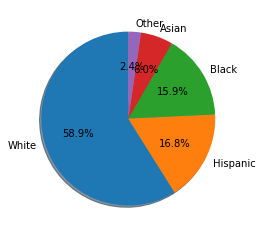

In [136]:
labels = ["White", "Hispanic", "Black", "Asian", "Other"]
plt.pie(demoAvgs,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [65]:
#Filter 2018 demographics to see gentrified neighborhoods
gentrifiedDemos2018 = demos2018[demos2018['Neighborhood'].isin(gentrified)]
gentrifiedDemos2018

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other
37,Lake View,99876,78859,8099,3320,6735,2863
38,Lincoln Park,67260,53151,4675,3134,4243,2057
46,Near North Side,86343,62243,4627,7376,9906,2191
47,Near South Side,23190,10433,1243,5488,5375,651
48,Near West Side,62560,26071,6105,18559,10267,1558
50,North Center,34942,26996,4378,713,1563,1292
66,Uptown,56296,30456,7468,10970,5773,1629
75,West Town,85307,50366,22561,6565,3464,2351


In [144]:
# gentrifiedDemos2018["avgWhite"] = gentrifiedDemos2018["White"]/gentrifiedDemos2018["Total Population"]
# gentrifiedDemos2018["avgHisp"] = gentrifiedDemos2018["Hispanic"]/gentrifiedDemos2018["Total Population"]
# gentrifiedDemos2018["avgBlack"] = gentrifiedDemos2018["Black"]/gentrifiedDemos2018["Total Population"]
# gentrifiedDemos2018["avgAsian"] = gentrifiedDemos2018["Asian"]/gentrifiedDemos2018["Total Population"]
# gentrifiedDemos2018["avgOther"] = gentrifiedDemos2018["Other"]/gentrifiedDemos2018["Total Population"]

avgWhite = gentrifiedDemos2018["White"].sum()
avgHisp = gentrifiedDemos2018["Hispanic"].sum()
avgBlack = gentrifiedDemos2018["Black"].sum()
avgAsian = gentrifiedDemos2018["Asian"].sum()
avgOther = gentrifiedDemos2018["Other"].sum()

demoAvgs = [avgWhite, avgHisp, avgBlack, avgAsian, avgOther]
demoAvgs

[338575, 59156, 56125, 47326, 14592]

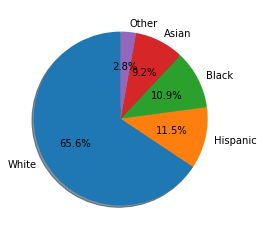

In [145]:
#View demogrpahic makeup of gentrified hoods 2018
plt.pie(demoAvgs,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [111]:
gentrifiedDemos2010 = demos2010[demos2010['Geog'].isin(gentrified)]
gentrifiedDemos2010 = gentrifiedDemos2010.rename(columns = {"Not Hispanic or Latino, White alone": "White",
                                                            "Not Hispanic or Latino, Black or African American alone" : "Black",
                                                            "Not Hispanic or Latino, Asian alone" : "Asian",
                                                            "Not Hispanic or Latino, American Indian and Alaska Native alone" : "Native American",
                                                            "Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone" : "Pacific Islander",
                                                            "Not Hispanic or Latino, Some Other Race alone" : "Any Other",
                                                            "Not Hispanic or Latino, Two or More Races" : "Mixed",
                                                            "Hispanic or Latino" : "Hispanic",
                                                            "Geog": "Neighborhood"
                                                           })
#reorder columns to summarize additional races as other
gentrifiedDemos2010 = gentrifiedDemos2010[["Neighborhood", "Total Population", "White", "Hispanic", "Black", "Asian", "Native American", "Pacific Islander", "Any Other", "Mixed"]]
gentrifiedDemos2010['Other']= gentrifiedDemos2010.iloc[:, -4:].sum(axis=1)

#remove additional races for comparison
gentrifiedDemos2010 = gentrifiedDemos2010[["Neighborhood", "Total Population", "White", "Hispanic", "Black", "Asian", "Other"]]
gentrifiedDemos2010



,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other
2,Uptown,56362,29098,8009,11275,6414,1566
4,North Center,31867,24634,4330,738,1449,716
5,Lake View,94368,75845,7198,3651,5653,2021
6,Lincoln Park,64116,53138,3571,2753,3296,1358
7,Near North Side,80484,58033,3974,8732,8140,1605
23,West Town,82236,47051,23901,6404,3106,1774
27,Near West Side,54881,23042,5048,17303,8022,1466
32,Near South Side,21390,10281,1202,6015,3307,585


In [141]:
avgWhite = gentrifiedDemos2010["White"].sum()
avgHisp = gentrifiedDemos2010["Hispanic"].sum()
avgBlack = gentrifiedDemos2010["Black"].sum()
avgAsian = gentrifiedDemos2010["Asian"].sum()
avgOther = gentrifiedDemos2010["Other"].sum()

demoAvgs = [avgWhite, avgHisp, avgBlack, avgAsian, avgOther]
demoAvgs

[321122, 57233, 56871, 39387, 11091]

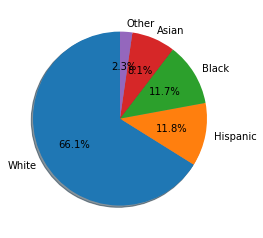

In [142]:

plt.pie(demoAvgs,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()